In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import least_squares
from scipy.spatial.transform import Rotation as R
import emcee

# Question (a)

In [3]:
# load the dataset and view its structure
file_path = "dataverse_files/1-Fragment_C_Hole_Measurements.csv"
df = pd.read_csv(file_path)

In [4]:
print(df)

    Section ID  Hole  Inter-hole Distance    Mean(X)   Mean(Y)
0            0     1                  NaN   15.59931  92.59653
1            1     2                  NaN   16.44167  91.50069
2            1     3             1.440694   17.30764  90.34931
3            1     4             1.456973   18.15278  89.16250
4            1     5             1.299821   18.96528  88.14792
..         ...   ...                  ...        ...       ...
76           7    77             1.259985  108.69444  63.42778
77           7    78             1.430105  110.05486  63.86875
78           7    79             1.179606  111.14583  64.31736
79           7    80             1.428043  112.48021  64.82604
80           7    81             1.259015  113.64028  65.31528

[81 rows x 5 columns]


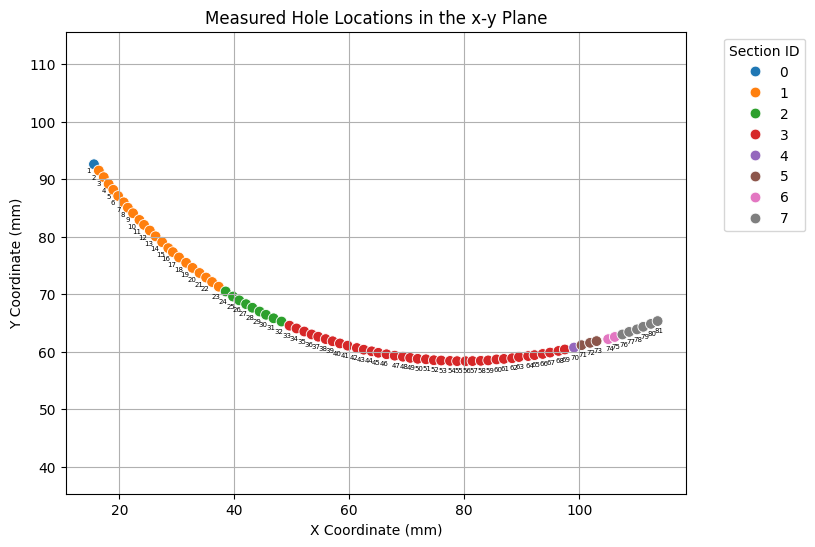

In [5]:
# scatter plot of hole locations
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Mean(X)", y="Mean(Y)", hue="Section ID", palette="tab10", s=60)

# Annotate each hole number
for _, row in df.iterrows():
    hole_id = int(row["Hole"])
    if hole_id <= 22:
        plt.text(row["Mean(X)"] - 0.5, row["Mean(Y)"] - 1.5, str(int(row["Hole"])), fontsize=5, ha='right')
    elif 22 < hole_id <= 46:
        plt.text(row["Mean(X)"] + 0.3, row["Mean(Y)"] - 2, str(int(row["Hole"])), fontsize=5, ha='right')
    else:
        plt.text(row["Mean(X)"] + 1, row["Mean(Y)"] - 2, str(int(row["Hole"])), fontsize=5, ha='right')

plt.xlabel("X Coordinate (mm)")
plt.ylabel("Y Coordinate (mm)")
plt.title("Measured Hole Locations in the x-y Plane")
plt.gca()
plt.legend(title="Section ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis("equal")
plt.grid(True)

# Question (b)

## (i) Fit a circle to the holes

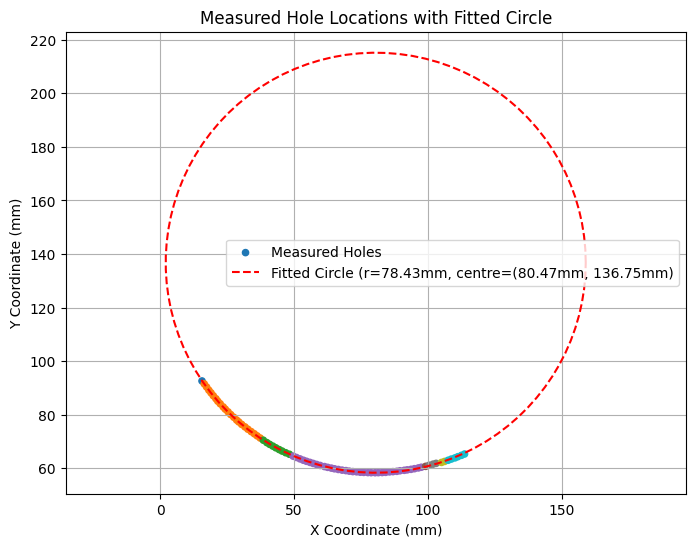

In [ ]:
# Load hole positions
x = df["Mean(X)"].values
y = df["Mean(Y)"].values

# Define function for least squares fitting
def residuals(params, x, y):
    x0, y0, r = params
    return np.sqrt((x - x0)**2 + (y - y0)**2) - r

# Initial guess for (x0, y0, r)
x0_guess, y0_guess = np.mean(x), np.mean(y)
r_guess = np.mean(np.sqrt((x - x0_guess)**2 + (y - y0_guess)**2))

# Perform least squares fitting
res = least_squares(residuals, [x0_guess, y0_guess, r_guess], args=(x, y))
x0_fit, y0_fit, r_fit = res.x

# Generate fitted circle points
theta = np.linspace(0, 2 * np.pi, 100)
x_fit = x0_fit + r_fit * np.cos(theta)
y_fit = y0_fit + r_fit * np.sin(theta)

# Plot measured hole locations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Measured Holes", c=df["Section ID"], cmap="tab10", s=20)
plt.plot(x_fit, y_fit, 'r--', label=f"Fitted Circle (r={r_fit:.2f}mm, centre=({x0_fit:.2f}mm, {y0_fit:.2f}mm)")

# Formatting
plt.xlabel("X Coordinate (mm)")
plt.ylabel("Y Coordinate (mm)")
plt.title("Measured Hole Locations with Fitted Circle")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()